# Mean-shift Clustering Technique

Mean-shift clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

Given a candidate centroid $x_i$ for iteration $t$, the candidate is updated according to the following equation:

$$x_i^{t+1} = x_i^t + m(x_i^t)$$

Where $N(x_i)$ is the neighborhood of samples within a given distance around $x_i$ and $m$ is the mean shift vector that is computed for each centroid that points towards a region of the maximum increase in the density of points. This is computed using the following equation, effectively updating a centroid to be the mean of the samples within its neighborhood:

$$m(x_i) = \frac{\sum_{x_j \in N(x_i)}K(x_j - x_i)x_j}{\sum_{x_j \in N(x_i)}K(x_j - x_i)}$$

**The algorithm automatically sets the number of clusters, instead of relying on a parameter bandwidth, which dictates the size of the region to search through**. This parameter can be set manually, but can be estimated using the provided estimate_bandwidth function, which is called if the bandwidth is not set.

**The algorithm is not highly scalable, as it requires multiple nearest neighbor searches** during the execution of the algorithm. The algorithm is guaranteed to converge, however the algorithm will stop iterating when the change in centroids is small.

# Make the synthetic data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.cluster import MeanShift
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

In [3]:
#Generate sample data
centers = [[1,1],[-1,-1],[1,-1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.4, random_state=101)
X.shape

(300, 2)

In [4]:
labels_true

array([0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 1, 2, 1, 0, 1, 0,
       1, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 2,
       1, 2, 1, 2, 0, 2, 2, 1, 0, 2, 0, 1, 2, 0, 2, 1, 1, 1, 0, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 1, 2, 2, 1,
       0, 2, 2, 2, 2, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0,
       1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 2, 2, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1,
       0, 2, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 0,
       1, 1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 1,
       2, 0, 1, 1, 0, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 1, 0, 1, 2, 1, 0, 1,
       1, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 0,
       1, 2, 1, 1, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 1,
       2, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2])

(array([-3., -2., -1.,  0.,  1.,  2.,  3.]),
 <a list of 7 Text yticklabel objects>)

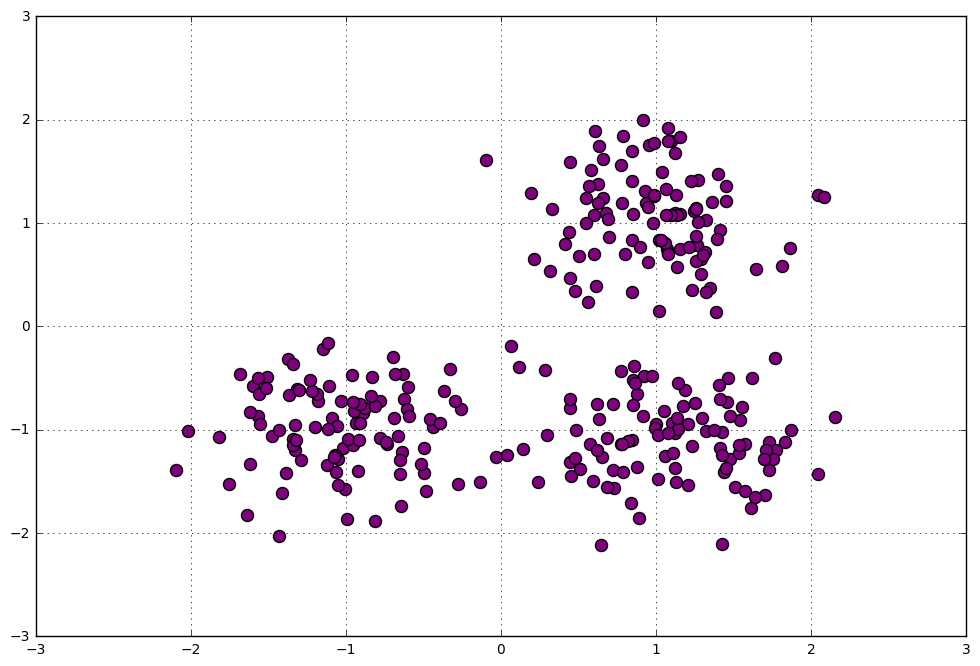

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(x=X[:,0], y=X[:,1], edgecolors='k', c='purple', s=75)
plt.grid(True)
plt.xticks()
plt.yticks()

# Clustering

In [6]:
ms_model = MeanShift().fit(X)
cluster_centers = ms_model.cluster_centers_
labels = ms_model.labels_
n_clusters = len(cluster_centers)

In [7]:
print("Number of clusters detected by the algorithm:", n_clusters)
print("Cluster centers detected at:\n\n", cluster_centers)

Number of clusters detected by the algorithm: 3
Cluster centers detected at:

 [[ 0.9931698   1.05074234]
 [ 1.09954715 -1.09294823]
 [-0.99420039 -0.96765319]]


(array([-3., -2., -1.,  0.,  1.,  2.,  3.]),
 <a list of 7 Text yticklabel objects>)

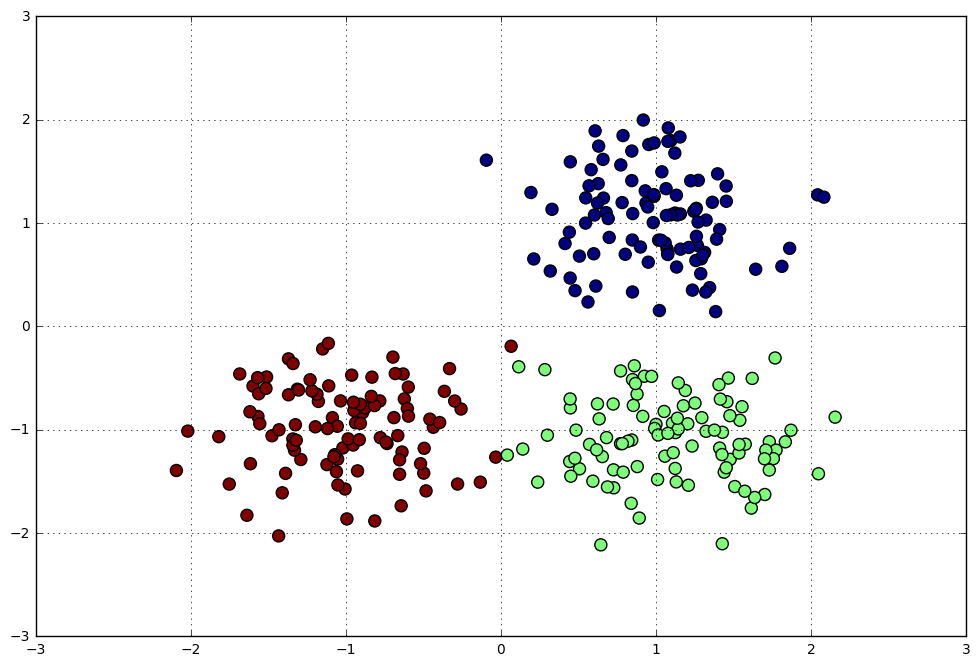

In [9]:
plt.figure(figsize=(12,8))
plt.scatter(x=X[:,0], y=X[:,1], edgecolors='k', c=labels, s=75)
plt.grid(True)
plt.xticks()
plt.yticks()

**Homogeneity**

Homogeneity metric of a cluster labeling given a ground truth.

A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class. This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

In [10]:
print ("Homogeneity score:", metrics.homogeneity_score(labels_true=labels_true,labels_pred=labels))

Homogeneity score: 0.9405073022327171


**Completeness**

Completeness metric of a cluster labeling given a ground truth.

A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster. This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

In [11]:
print ("Completeness score:", metrics.completeness_score(labels_true=labels_true,labels_pred=labels))

Completeness score: 0.9405073022327171


# Time complexity and model quality as the data size grows

In [13]:
import time
from tqdm import tqdm

In [14]:
n_samples = [10,20,50,100,200,500,1000,2000,3000,5000,7500,10000]
centers = [[1, 1], [-1, -1], [1, -1]]
t_ms = []
homo_ms=[]
complete_ms=[]

for i in tqdm(n_samples):
    X, labels_true = make_blobs(n_samples=i, centers=centers, cluster_std=0.4, random_state=101)
    start=time.time()
    ms_model = MeanShift().fit(X)
    end=time.time()
    t_ms.append(end-start)
    homo_ms.append(metrics.homogeneity_score(labels_true=labels_true,labels_pred=ms_model.labels_))
    complete_ms.append(metrics.completeness_score(labels_true=labels_true,labels_pred=ms_model.labels_))

100%|██████████| 12/12 [00:45<00:00,  9.95s/it]


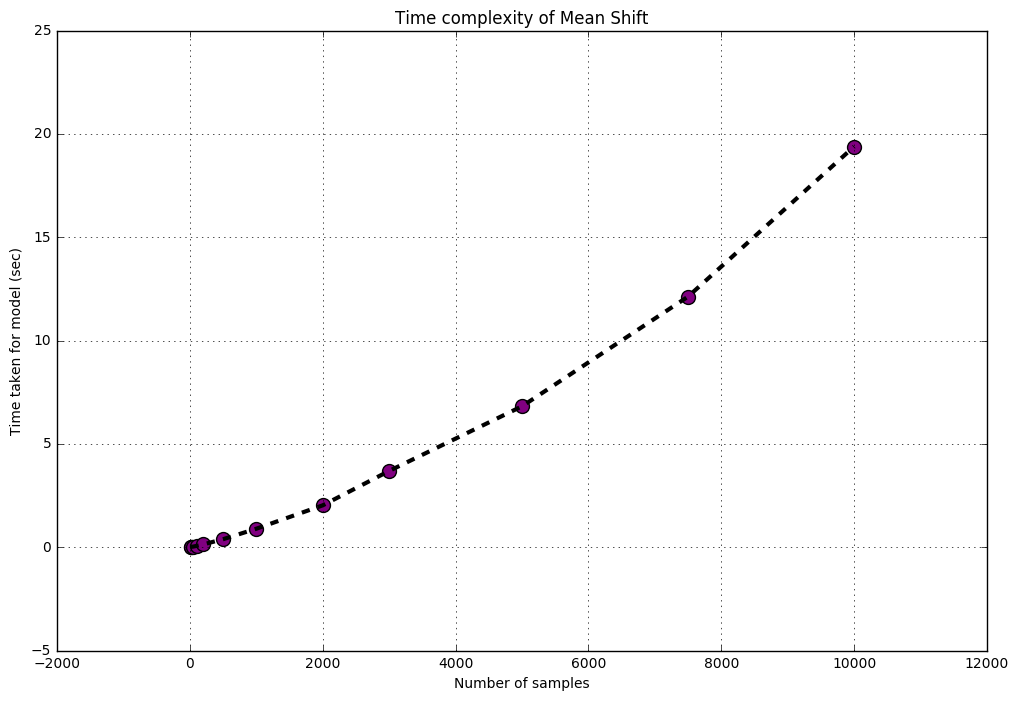

In [15]:
plt.figure(figsize=(12,8))
plt.title('Time complexity of Mean Shift')
plt.scatter(x=n_samples, y=t_ms, edgecolors='k', c='purple', s=100)
plt.plot(n_samples, t_ms, 'k--', lw=3)
plt.grid(True)
plt.xticks()
plt.xlabel('Number of samples')
plt.yticks()
plt.ylabel('Time taken for model (sec)')

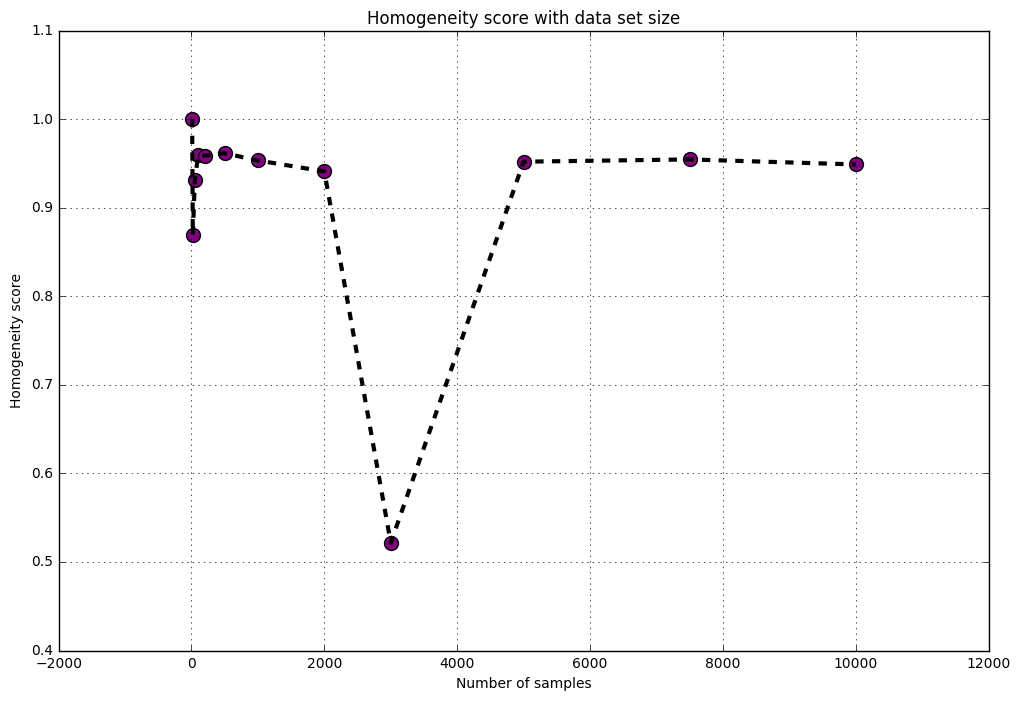

In [16]:
plt.figure(figsize=(12,8))
plt.title('Homogeneity score with data set size')
plt.scatter(x=n_samples, y=homo_ms, edgecolors='k', c='purple', s=100)
plt.plot(n_samples, homo_ms, 'k--', lw=3)
plt.grid(True)
plt.xticks()
plt.xlabel('Number of samples')
plt.yticks()
plt.ylabel('Homogeneity score')

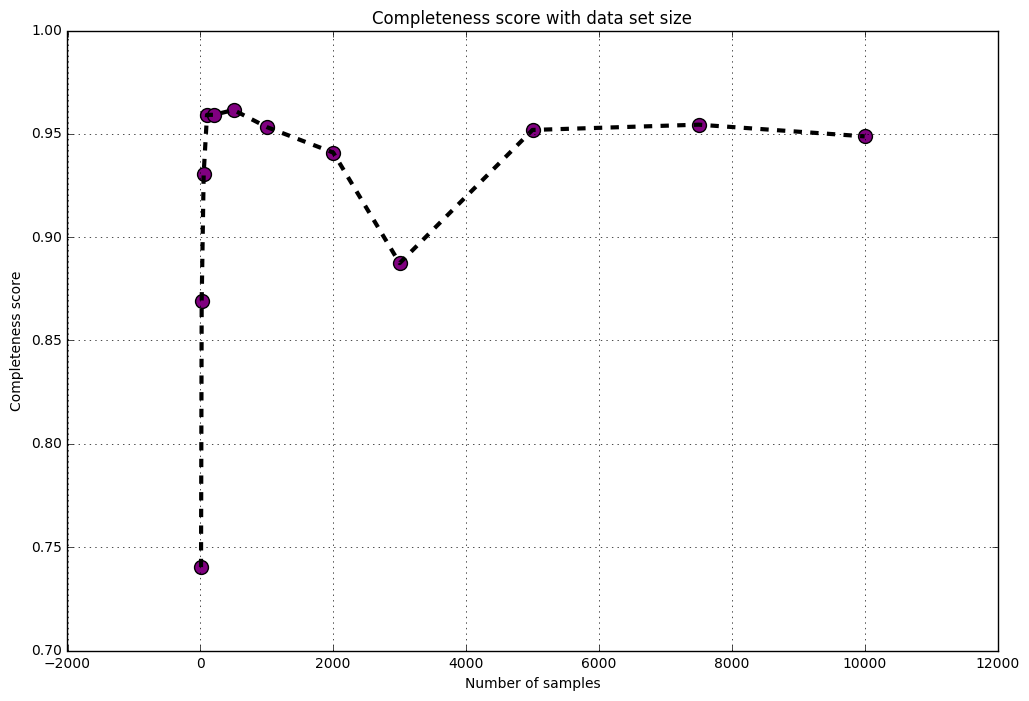

In [17]:
plt.figure(figsize=(12,8))
plt.title('Completeness score with data set size')
plt.scatter(x=n_samples, y=complete_ms, edgecolors='k', c='purple', s=100)
plt.plot(n_samples, complete_ms, 'k--', lw=3)
plt.grid(True)
plt.xticks()
plt.xlabel('Number of samples')
plt.yticks()
plt.ylabel('Completeness score')

# How well the cluster detection works in the presence of noise?
Create data sets with varying degree of noise std. dev and run the model to detect clusters.

In [19]:
noise = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.25,1.5,1.75,2.0]
n_clusters = []
for i in noise:
    centers = [[1,1],[-1,-1],[1,-1]]
    X, labels_true = make_blobs(n_samples=200, centers=centers, cluster_std=i, random_state=101)
    ms_model = MeanShift().fit(X)
    n_clusters.append(len(ms_model.cluster_centers_))

Detected number of clusters: [3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]


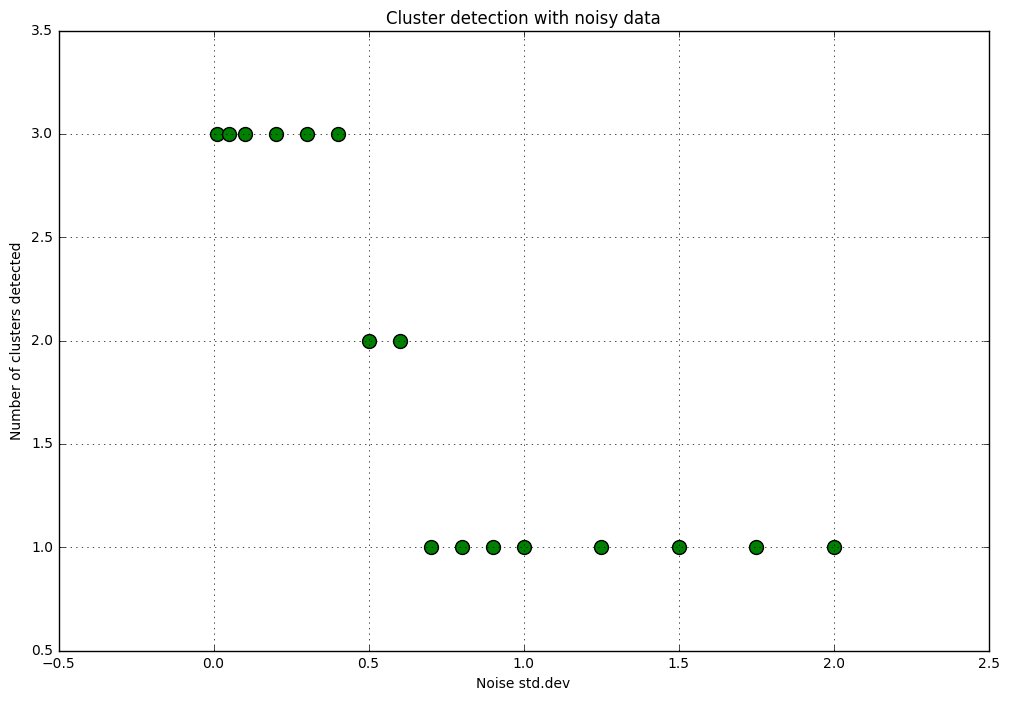

In [20]:
print("Detected number of clusters:",n_clusters)
plt.figure(figsize=(12,8))
plt.title('Cluster detection with noisy data')
plt.scatter(x=noise, y=n_clusters, edgecolors='k', c='green', s=100)
plt.grid(True)
plt.xticks()
plt.xlabel('Noise std.dev')
plt.yticks()
plt.ylabel('Number of clusters detected')

## We see that the cluster detection works well up to a certain level of noise std. dev, after which the mean of the blobs shifts to the overall centroid and the number of detected clusters tends to 1